In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scm_models import LawSchool


In [2]:
# set relevant paths
wrk_dir = os.path.dirname(os.getcwd())
data_path = wrk_dir + '\\' + 'data' + '\\'
rslt_path = wrk_dir + '\\' + 'results' + '\\'

## Generate the structural counterfactuals (SCF) for pooled U (pU)

In [5]:
df = pd.read_csv(rslt_path + 'pU_upd_LawData.csv', sep='|')
print(df.shape)
print(df.columns)
df.head(5)

(10896, 7)
Index(['LSAT', 'UGPA', 'female', 'male', 'white', 'nonwhite', 'U'], dtype='object')


,LSAT,UGPA,female,male,white,nonwhite,U
2,36,3.0,1,0,1,0,-0.736926
3,30,3.1,0,1,1,0,-0.267031
4,39,2.2,0,1,0,1,-1.647028
5,37,3.4,1,0,1,0,0.118742
6,30,3.6,1,0,1,0,0.502870


In [6]:
ugpa_weights = pd.read_csv(rslt_path + 'pU_wUGPA_LawData.csv', sep='|')
ugpa_weights

,female,male,white,nonwhite,ugpa0,eta_u_ugpa
0,0.77306,0.640014,0.938756,0.713025,1.621285,0.350264


In [7]:
lsat_weights = pd.read_csv(rslt_path + 'pU_wLSAT_LawData.csv', sep='|')
lsat_weights

,female,male,white,nonwhite,lsat0,eta_u_lsat
0,0.851098,0.867346,0.960812,0.823301,1.802908,0.032696


In [8]:
# check the diff files...
ugpa_deltas = pd.read_csv(rslt_path + 'pU_delta_ugpa.csv', sep='|')
ugpa_deltas.head(10)

,UGPA,sex,race_nonwhite,ugpa0,weighted_sense_cols,weighted_u,pred_UGPA,delta
2,3.0,Female,White,1.621285,1.711816,-0.258119,3.074983,0.074983
3,3.1,Male,White,1.621285,1.578770,-0.093531,3.106524,0.006524
4,2.2,Male,NonWhite,1.621285,1.353039,-0.576895,2.397430,0.197430
5,3.4,Female,White,1.621285,1.711816,0.041591,3.374692,-0.025308
6,3.6,Female,White,1.621285,1.711816,0.176137,3.509239,-0.090761
7,3.6,Male,White,1.621285,1.578770,0.311522,3.511577,-0.088423
8,2.7,Male,White,1.621285,1.578770,-0.380976,2.819079,0.119079
11,3.2,Male,White,1.621285,1.578770,-0.014245,3.185811,-0.014189
12,3.1,Male,White,1.621285,1.578770,-0.070931,3.129125,0.029125
15,2.3,Male,White,1.621285,1.578770,-0.658060,2.541995,0.241995


In [9]:
lsat_deltas = pd.read_csv(rslt_path + 'pU_delta_lsat.csv', sep='|')
lsat_deltas.head(10)

,LSAT,sex,race_nonwhite,lsat0,weighted_sense_cols,weighted_u,pred_LSAT,delta
2,36,Female,White,1.802908,1.811910,-0.024095,36.260282,0.260282
3,30,Male,White,1.802908,1.828158,-0.008731,37.424839,7.424839
4,39,Male,NonWhite,1.802908,1.690647,-0.053851,31.177707,-7.822293
5,37,Female,White,1.802908,1.811910,0.003882,37.289056,0.289056
6,30,Female,White,1.802908,1.811910,0.016442,37.760340,7.760340
7,36,Male,White,1.802908,1.828158,0.029080,38.866980,2.866980
8,37,Male,White,1.802908,1.828158,-0.035563,36.434009,-0.565991
11,41,Male,White,1.802908,1.828158,-0.001330,37.702854,-3.297146
12,35,Male,White,1.802908,1.828158,-0.006621,37.503878,2.503878
15,41,Male,White,1.802908,1.828158,-0.061428,35.503731,-5.496269


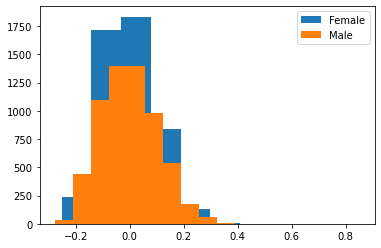

In [17]:
plt.hist(ugpa_deltas[ugpa_deltas['sex']=='Female']['delta'], label = 'Female')
plt.hist(ugpa_deltas[ugpa_deltas['sex']=='Male']['delta'], label = 'Male')
plt.legend(loc='upper right')

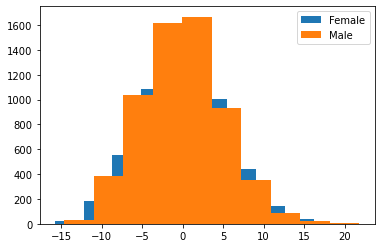

In [18]:
plt.hist(lsat_deltas[ugpa_deltas['sex']=='Female']['delta'], label = 'Female')
plt.hist(lsat_deltas[ugpa_deltas['sex']=='Male']['delta'], label = 'Male')
plt.legend(loc='upper right')

In [19]:
dag_law_school = [('U', 'UGPA', ugpa_weights.loc[0, 'eta_u_ugpa']),
                  ('U', 'LSAT', lsat_weights.loc[0, 'eta_u_lsat']),
                  ('female', 'UGPA', ugpa_weights.loc[0, 'female']),
                  ('male', 'UGPA', ugpa_weights.loc[0, 'male']),
                  ('white', 'UGPA', ugpa_weights.loc[0, 'white']),
                  ('nonwhite', 'UGPA', ugpa_weights.loc[0, 'nonwhite']),
                  ('female', 'LSAT', lsat_weights.loc[0, 'female']),
                  ('male', 'LSAT', lsat_weights.loc[0, 'male']),
                  ('white', 'LSAT', lsat_weights.loc[0, 'white']),
                  ('nonwhite', 'LSAT', lsat_weights.loc[0, 'nonwhite'])  
                 ]
dag_law_school

[('U', 'UGPA', 0.35026399476484804),
 ('U', 'LSAT', 0.0326959683105284),
 ('female', 'UGPA', 0.7730603366620609),
 ('male', 'UGPA', 0.6400142403982011),
 ('white', 'UGPA', 0.9387557544129591),
 ('nonwhite', 'UGPA', 0.7130248092744692),
 ('female', 'LSAT', 0.851097530659986),
 ('male', 'LSAT', 0.867345506707074),
 ('white', 'LSAT', 0.9608122538399481),
 ('nonwhite', 'LSAT', 0.823301257973325)]

In [20]:
scm_law_school = LawSchool(dag_law_school)

In [21]:
scm_law_school.nodes

['U', 'UGPA', 'LSAT', 'female', 'male', 'white', 'nonwhite']

In [22]:
scm_law_school.weights

{('U', 'UGPA'): 0.35026399476484804,
 ('U', 'LSAT'): 0.0326959683105284,
 ('female', 'UGPA'): 0.7730603366620609,
 ('male', 'UGPA'): 0.6400142403982011,
 ('white', 'UGPA'): 0.9387557544129591,
 ('nonwhite', 'UGPA'): 0.7130248092744692,
 ('female', 'LSAT'): 0.851097530659986,
 ('male', 'LSAT'): 0.867345506707074,
 ('white', 'LSAT'): 0.9608122538399481,
 ('nonwhite', 'LSAT'): 0.823301257973325}

In [23]:
scm_law_school.adjacency_mtr

,U,UGPA,LSAT,female,male,white,nonwhite
U,0,0.350264,0.032696,0,0,0,0
UGPA,0,0.000000,0.000000,0,0,0,0
LSAT,0,0.000000,0.000000,0,0,0,0
female,0,0.773060,0.851098,0,0,0,0
male,0,0.640014,0.867346,0,0,0,0
white,0,0.938756,0.960812,0,0,0,0
nonwhite,0,0.713025,0.823301,0,0,0,0


In [24]:
scm_law_school.adjacency_lst

{'U': ['UGPA', 'LSAT'],
 'UGPA': [],
 'LSAT': [],
 'female': ['UGPA', 'LSAT'],
 'male': ['UGPA', 'LSAT'],
 'white': ['UGPA', 'LSAT'],
 'nonwhite': ['UGPA', 'LSAT']}

In [13]:
"""
The structal equations:

UGPA = ugpa0 + w_U->UGPA * U + w_female->UGPA * female +
        w_male->UGPA * male + w_white->UGPA * white +  w_nonwhite->UGPA * nonwhite 
        
LSAT = lsat0 + w_U->UGPA * U + w_female->UGPA * female +
        w_male->UGPA * male + w_white->UGPA * white +  w_nonwhite->UGPA * nonwhite 
"""

'\nThe structal equations:\n\nUGPA = ugpa0 + w_U->UGPA * U + w_female->UGPA * female +\n        w_male->UGPA * male + w_white->UGPA * white +  w_nonwhite->UGPA * nonwhite \n        \nLSAT = lsat0 + w_U->UGPA * U + w_female->UGPA * female +\n        w_male->UGPA * male + w_white->UGPA * white +  w_nonwhite->UGPA * nonwhite \n'

In [25]:
# notice that each weight except for the intercept belongs to the adjacency matrix
adj_mtr = scm_law_school.adjacency_mtr
adj_mtr

,U,UGPA,LSAT,female,male,white,nonwhite
U,0,0.350264,0.032696,0,0,0,0
UGPA,0,0.000000,0.000000,0,0,0,0
LSAT,0,0.000000,0.000000,0,0,0,0
female,0,0.773060,0.851098,0,0,0,0
male,0,0.640014,0.867346,0,0,0,0
white,0,0.938756,0.960812,0,0,0,0
nonwhite,0,0.713025,0.823301,0,0,0,0


In [26]:
# to avoid confusion, denote input with v_
def pred_ugpa(v_u, v_female, v_male, v_white, v_nonwhite):
    return (ugpa_weights.loc[0, 'ugpa0'] + 
            adj_mtr.loc['U']['UGPA'] * v_u +
            adj_mtr.loc['female']['UGPA'] * v_female +
            adj_mtr.loc['male']['UGPA'] * v_male +
            adj_mtr.loc['white']['UGPA'] * v_white +
            adj_mtr.loc['nonwhite']['UGPA'] * v_nonwhite)

def pred_lsat(v_u, v_female, v_male, v_white, v_nonwhite):
    return np.exp(lsat_weights.loc[0, 'lsat0'] + 
                  adj_mtr.loc['U']['LSAT'] * v_u +
                  adj_mtr.loc['female']['LSAT'] * v_female +
                  adj_mtr.loc['male']['LSAT'] * v_male +
                  adj_mtr.loc['white']['LSAT'] * v_white +
                  adj_mtr.loc['nonwhite']['LSAT'] * v_nonwhite)

In [27]:
for idx, row in df.iterrows():
    print(idx)
    
    p_ugpa = pred_ugpa(v_u=row['U'], 
                       v_female=row['female'], 
                       v_male=row['male'], 
                       v_white=row['white'], 
                       v_nonwhite=row['nonwhite'])
    
    p_lsat = pred_ugpa(v_u=row['U'], 
                       v_female=row['female'], 
                       v_male=row['male'], 
                       v_white=row['white'], 
                       v_nonwhite=row['nonwhite'])
    
    print(row['UGPA'])
    print(p_ugpa)
    
    print(row['LSAT'])
    print(p_lsat)

2
3.0
3.0749826488832315
36.0
3.0749826488832315
3
3.1
3.1065238038826006
30.0
3.1065238038826006
4
2.2
2.3974297100589435
39.0
2.3974297100589435
5
3.4
3.374692250306649
37.0
3.374692250306649
6
3.6
3.5092386842175425
30.0
3.5092386842175425
7
3.6
3.5115774662361114
36.0
3.5115774662361114
8
2.7
2.8190792463112517
37.0
2.8190792463112517
11
3.2
3.1858106787751983
41.0
3.1858106787751983
12
3.1
3.1291245532836847
35.0
3.1291245532836847
15
2.3
2.541995314320322
41.0
2.541995314320322
22
3.1
3.089763223984948
30.0
3.089763223984948
25
3.6
3.5331317590047666
37.0
3.5331317590047666
30
2.6
2.7541799727961593
36.0
2.7541799727961593
34
2.7
2.861478903971871
36.0
2.861478903971871
38
3.6
3.4913855826781726
36.0
3.4913855826781726
42
3.2
3.130021052766243
19.0
3.130021052766243
46
2.8
2.906469586150043
36.0
2.906469586150043
47
3.0
3.007613524017585
32.0
3.007613524017585
48
3.7
3.6163856466495576
38.0
3.6163856466495576
50
2.8
2.896325557988322
38.0
2.896325557988322
51
3.4
3.37909955032677

653
2.9
2.9327607766881494
39.0
2.9327607766881494
656
2.8
2.9334103629133335
35.0
2.9334103629133335
658
2.9
2.96796323699831
33.0
2.96796323699831
660
2.6
2.680216683082776
29.0
2.680216683082776
663
2.4
2.536808684183427
28.0
2.536808684183427
666
2.4
2.5792528862819752
29.0
2.5792528862819752
668
3.2
3.1852900673040496
32.0
3.1852900673040496
670
3.4
3.3197897665397753
30.0
3.3197897665397753
671
3.7
3.5907713608708507
40.0
3.5907713608708507
672
4.0
3.8574226779674596
46.0
3.8574226779674596
674
3.3
3.2196632575827464
33.0
3.2196632575827464
675
3.7
3.590694999102162
47.0
3.590694999102162
676
3.6
3.454718952868083
36.0
3.454718952868083
680
3.7
3.636850555657107
46.0
3.636850555657107
685
3.7
3.624059374683465
41.0
3.624059374683465
689
3.8
3.666706856983476
45.0
3.666706856983476
692
3.4
3.34821317542674
41.0
3.34821317542674
693
3.5
3.4818354045284408
43.0
3.4818354045284408
696
3.2
3.1429979465061075
34.0
3.1429979465061075
699
3.9
3.7587084125241574
39.0
3.7587084125241574
70

1037
2.5
2.6818915369495793
38.0
2.6818915369495793
1038
3.5
3.3526761335229405
28.0
3.3526761335229405
1040
3.8
3.6402129499170464
34.0
3.6402129499170464
1041
3.2
3.2279073345670377
37.0
3.2279073345670377
1042
4.0
3.8322292167576366
37.0
3.8322292167576366
1043
2.5
2.6788605621958195
41.0
2.6788605621958195
1049
2.6
2.77293809468086
42.0
2.77293809468086
1051
3.2
3.20866848703157
36.0
3.20866848703157
1054
2.9
2.9543216799810494
36.0
2.9543216799810494
1055
3.0
3.050518681767436
36.0
3.050518681767436
1057
3.6
3.5136315376993457
32.0
3.5136315376993457
1059
3.0
3.0475111427147517
36.0
3.0475111427147517
1060
3.1
3.1025974779166736
36.0
3.1025974779166736
1061
2.8
2.9364988228490976
36.0
2.9364988228490976
1062
3.5
3.3986887254104676
37.0
3.3986887254104676
1063
3.5
3.4154269866875846
34.0
3.4154269866875846
1064
3.4
3.2922376024293736
34.0
3.2922376024293736
1065
2.9
2.9405915280317894
31.0
2.9405915280317894
1067
3.4
3.3685078104650388
35.0
3.3685078104650388
1070
2.6
2.76158986055

4.0
3.778971179067526
38.0
3.778971179067526
1748
3.3
3.335331036920998
41.0
3.335331036920998
1750
3.4
3.37358991622493
44.0
3.37358991622493
1752
3.4
3.356875872499533
41.0
3.356875872499533
1754
2.5
2.680660188369026
37.0
2.680660188369026
1757
3.5
3.468414387469828
41.0
3.468414387469828
1764
3.4
3.3882340869792333
36.0
3.3882340869792333
1765
3.9
3.6478718907441654
21.0
3.6478718907441654
1766
2.7
2.834157047898464
42.0
2.834157047898464
1768
3.0
2.9817284292952646
26.0
2.9817284292952646
1769
3.2
3.2404415179320187
39.0
3.2404415179320187
1770
3.5
3.461280015585468
34.0
3.461280015585468
1771
3.7
3.6187765398726173
38.0
3.6187765398726173
1772
3.6
3.492114945799901
37.0
3.492114945799901
1774
3.1
3.1203469168286286
36.0
3.1203469168286286
1775
3.2
3.2050855427548015
42.0
3.2050855427548015
1776
3.8
3.6510512601192744
37.0
3.6510512601192744
1781
3.0
3.0907341688926513
38.0
3.0907341688926513
1782
3.1
3.046299190311484
29.0
3.046299190311484
1784
3.3
3.2535817523591857
34.0
3.2535

2347
2.7
2.8295056398658684
30.0
2.8295056398658684
2350
3.0
3.0586154932710428
41.0
3.0586154932710428
2351
3.2
3.229769572904391
37.0
3.229769572904391
2353
3.6
3.5501044318964063
43.0
3.5501044318964063
2357
2.6
2.7896155966967244
37.0
2.7896155966967244
2361
3.6
3.547017134979532
40.0
3.547017134979532
2365
3.4
3.36840687614632
37.0
3.36840687614632
2366
3.5
3.372089401409864
22.0
3.372089401409864
2367
3.7
3.576417595843715
39.0
3.576417595843715
2371
3.4
3.347856741205984
40.0
3.347856741205984
2372
2.6
2.700513278918486
38.0
2.700513278918486
2375
3.1
3.1338437510099717
37.0
3.1338437510099717
2376
3.3
3.259345063489584
35.0
3.259345063489584
2379
3.6
3.465912189965917
31.0
3.465912189965917
2381
2.6
2.763973494380928
44.0
2.763973494380928
2384
3.3
3.3230585648003084
39.0
3.3230585648003084
2385
3.4
3.336965393868576
34.0
3.336965393868576
2387
3.1
3.120394537710678
33.0
3.120394537710678
2388
3.6
3.5136862358288927
34.0
3.5136862358288927
2389
3.3
3.2860222096688596
40.0
3.286

42.0
2.992978566044775
2921
3.6
3.523055285628164
43.0
3.523055285628164
2924
2.8
2.9198313542381804
48.0
2.9198313542381804
2928
3.5
3.431560852216303
45.0
3.431560852216303
2929
3.8
3.655672768595997
40.0
3.655672768595997
2930
3.6
3.4790142945877176
45.0
3.4790142945877176
2931
3.7
3.6324558712384336
47.0
3.6324558712384336
2935
3.7
3.610126859272149
39.0
3.610126859272149
2936
3.9
3.7915650259933726
48.0
3.7915650259933726
2937
3.4
3.367001174508145
42.0
3.367001174508145
2938
3.5
3.4266746279146867
44.0
3.4266746279146867
2939
3.5
3.439674949409248
46.0
3.439674949409248
2942
3.6
3.559513344119974
46.0
3.559513344119974
2945
3.4
3.3791325259394043
45.0
3.3791325259394043
2946
4.0
3.8268138363259587
44.0
3.8268138363259587
2947
3.8
3.6459353956322214
42.0
3.6459353956322214
2952
3.7
3.5834699014949045
47.0
3.5834699014949045
2955
3.8
3.7086109287308404
48.0
3.7086109287308404
2957
3.8
3.591204620061635
38.0
3.591204620061635
2958
3.8
3.6571047865753377
42.0
3.6571047865753377
2960


3492
3.0
3.017857971273847
31.0
3.017857971273847
3493
2.6
2.7467537878688075
36.0
2.7467537878688075
3494
2.9
2.9722352284911158
36.0
2.9722352284911158
3496
3.0
3.064600313149705
43.0
3.064600313149705
3498
2.9
3.026439080276424
40.0
3.026439080276424
3499
3.4
3.2861684644153395
32.0
3.2861684644153395
3500
3.0
3.0552745530046757
39.0
3.0552745530046757
3501
3.3
3.2908958575593465
40.0
3.2908958575593465
3502
3.2
3.2505543164103994
40.0
3.2505543164103994
3503
3.5
3.4312262176451176
39.0
3.4312262176451176
3506
3.2
3.22574344231141
40.0
3.22574344231141
3508
3.3
3.2991436189891923
37.0
3.2991436189891923
3509
3.3
3.2672377408981492
38.0
3.2672377408981492
3510
3.4
3.396030947586258
38.0
3.396030947586258
3513
3.0
3.0489123820152164
39.0
3.0489123820152164
3517
3.4
3.348783107280687
38.0
3.348783107280687
3518
3.4
3.3332085047232916
36.0
3.3332085047232916
3519
2.8
2.8981498725468264
40.0
2.8981498725468264
3520
2.6
2.752496745233132
40.0
2.752496745233132
3521
3.4
3.347696077348402
4

4060
3.9
3.7489512843390305
39.0
3.7489512843390305
4063
3.3
3.288793227610633
35.0
3.288793227610633
4064
2.7
2.8426620022873093
43.0
2.8426620022873093
4065
3.6
3.531537878121725
32.0
3.531537878121725
4066
3.3
3.3007212365255807
31.0
3.3007212365255807
4067
4.0
3.7947038477234076
39.0
3.7947038477234076
4070
3.6
3.4713463623278473
32.0
3.4713463623278473
4071
2.9
2.982128155290252
42.0
2.982128155290252
4074
3.5
3.4134422604902444
37.0
3.4134422604902444
4075
2.9
2.963141637619687
39.0
2.963141637619687
4079
2.6
2.723799687541644
41.0
2.723799687541644
4080
3.2
3.1984869357592967
32.0
3.1984869357592967
4081
3.8
3.651460651914427
34.0
3.651460651914427
4086
3.0
3.0530570258318925
39.0
3.0530570258318925
4089
3.2
3.2229692602812596
34.0
3.2229692602812596
4091
3.6
3.5049043631918773
34.0
3.5049043631918773
4092
3.2
3.191956947960933
35.0
3.191956947960933
4094
3.1
3.1100185230743094
34.0
3.1100185230743094
4095
3.4
3.3807795315459024
35.0
3.3807795315459024
4100
3.0
3.056006455636821

2.897347064161183
4641
3.0
3.0734970156647936
32.0
3.0734970156647936
4642
3.1
3.1343234466659755
40.0
3.1343234466659755
4643
3.5
3.4588480429219994
34.0
3.4588480429219994
4645
2.5
2.640168511441099
28.0
2.640168511441099
4647
2.9
2.969433062047028
36.0
2.969433062047028
4652
2.7
2.8267508187437707
37.0
2.8267508187437707
4653
3.0
3.0290046234617085
36.0
3.0290046234617085
4654
2.9
2.9862833105916287
41.0
2.9862833105916287
4655
3.6
3.4960399484227396
35.0
3.4960399484227396
4656
2.4
2.6045828222677407
39.0
2.6045828222677407
4657
2.4
2.6095134921429697
42.0
2.6095134921429697
4658
3.1
3.110984282722345
35.0
3.110984282722345
4664
3.0
3.075366882321248
38.0
3.075366882321248
4667
3.0
3.039150330698843
33.0
3.039150330698843
4670
2.7
2.8589109529043646
38.0
2.8589109529043646
4671
3.1
3.125032708241579
34.0
3.125032708241579
4675
3.4
3.349969557803753
37.0
3.349969557803753
4679
3.2
3.191702484191896
33.0
3.191702484191896
4681
2.7
2.8311880670667926
34.0
2.8311880670667926
4683
3.0
3

3.8
3.672809052739143
45.0
3.672809052739143
5212
3.6
3.4527911254906596
37.0
3.4527911254906596
5214
3.1
3.1391625738900717
43.0
3.1391625738900717
5216
3.6
3.511861371944964
38.0
3.511861371944964
5219
3.9
3.7749229142165914
42.0
3.7749229142165914
5220
3.8
3.68768318319413
41.0
3.68768318319413
5222
3.8
3.6785636890610256
40.0
3.6785636890610256
5227
3.8
3.7074271224893374
41.0
3.7074271224893374
5230
3.3
3.2582794699293203
32.0
3.2582794699293203
5231
3.3
3.2803261032214626
41.0
3.2803261032214626
5233
3.4
3.3241471026196905
35.0
3.3241471026196905
5234
3.7
3.5760615569857817
39.0
3.5760615569857817
5236
3.2
3.245389449036253
39.0
3.245389449036253
5238
3.8
3.726650575079676
45.0
3.726650575079676
5241
3.4
3.367677180504075
45.0
3.367677180504075
5242
3.7
3.5845911282277876
39.0
3.5845911282277876
5245
3.5
3.451494820703324
47.0
3.451494820703324
5251
3.9
3.742704171184039
37.0
3.742704171184039
5254
3.9
3.7496346273564765
42.0
3.7496346273564765
5255
3.4
3.372194315288511
47.0
3.3

3.2
3.179910685404466
35.0
3.179910685404466
5863
3.5
3.45142953177638
32.0
3.45142953177638
5864
3.0
3.061603178699564
42.0
3.061603178699564
5865
3.9
3.731268875427364
31.0
3.731268875427364
5867
3.3
3.2834013891324627
39.0
3.2834013891324627
5868
3.5
3.4223043315215516
35.0
3.4223043315215516
5869
3.1
3.154514404995744
38.0
3.154514404995744
5871
3.8
3.6945913469772784
36.0
3.6945913469772784
5875
3.3
3.27225899223595
37.0
3.27225899223595
5876
3.0
3.0986013067300266
38.0
3.0986013067300266
5877
3.4
3.3880214412846827
41.0
3.3880214412846827
5878
3.4
3.3799803797176753
36.0
3.3799803797176753
5881
3.2
3.237113096935445
37.0
3.237113096935445
5883
3.4
3.344272429022283
37.0
3.344272429022283
5884
3.7
3.6003289014231994
34.0
3.6003289014231994
5887
3.5
3.470522947651536
37.0
3.470522947651536
5888
2.9
3.019751042567484
42.0
3.019751042567484
5891
3.0
3.085358168853905
37.0
3.085358168853905
5895
2.7
2.87086778189896
40.0
2.87086778189896
5896
3.2
3.191135025813073
35.0
3.1911350258130

2.6
2.672566711806777
26.0
2.672566711806777
6398
2.8
2.9397917262142275
38.0
2.9397917262142275
6399
3.1
3.155674156894293
36.0
3.155674156894293
6402
3.1
3.041618118873512
31.0
3.041618118873512
6403
3.1
3.162488251851567
36.0
3.162488251851567
6406
3.5
3.411877090260945
34.0
3.411877090260945
6407
2.5
2.6331710303766442
27.0
2.6331710303766442
6408
3.3
3.2691771994640986
34.0
3.2691771994640986
6409
3.2
3.168452103668849
33.0
3.168452103668849
6411
3.3
3.261344263455725
34.0
3.261344263455725
6413
2.9
3.01873555253841
39.0
3.01873555253841
6417
3.2
3.1933953490016056
34.0
3.1933953490016056
6418
3.2
3.1583816107395926
23.0
3.1583816107395926
6424
3.1
3.1037334085554056
34.0
3.1037334085554056
6427
3.1
3.0476831551890626
26.0
3.0476831551890626
6429
3.0
3.0760028989549077
36.0
3.0760028989549077
6430
3.0
3.063701543707756
36.0
3.063701543707756
6431
2.7
2.8707162634788563
37.0
2.8707162634788563
6433
2.9
3.027199625275339
41.0
3.027199625275339
6436
2.8
2.9010473025932937
37.0
2.9010

2.9299300014012886
35.0
2.9299300014012886
6972
2.5
2.659115341063985
35.0
2.659115341063985
6975
4.0
3.801761631493041
42.0
3.801761631493041
6976
2.3
2.52316192666505
40.0
2.52316192666505
6978
3.0
3.037907726661509
36.0
3.037907726661509
6979
3.0
3.0353060776575846
37.0
3.0353060776575846
6981
3.0
3.0280686124571288
30.0
3.0280686124571288
6982
2.4
2.5865305128777707
33.0
2.5865305128777707
6984
3.1
3.140119570698131
40.0
3.140119570698131
6985
2.8
2.9312372062878906
36.0
2.9312372062878906
6987
2.8
2.859316758939605
28.0
2.859316758939605
6988
3.2
3.2120690979513196
33.0
3.2120690979513196
6989
3.2
3.2219186755904974
31.0
3.2219186755904974
6990
3.1
3.1292873995733563
30.0
3.1292873995733563
6991
3.7
3.5485690523450133
33.0
3.5485690523450133
6993
2.9
2.992351522267335
35.0
2.992351522267335
6994
3.9
3.785738435154048
44.0
3.785738435154048
6996
3.2
3.22287537047824
35.0
3.22287537047824
6998
3.2
3.190482329870283
35.0
3.190482329870283
7002
3.5
3.446101606963207
34.0
3.44610160696

3.3
3.2854794931983577
34.0
3.2854794931983577
7542
3.1
3.1008323328368843
31.0
3.1008323328368843
7547
2.9
2.9647281543226525
34.0
2.9647281543226525
7554
3.4
3.3605508170278386
36.0
3.3605508170278386
7556
3.3
3.2617623904787663
34.0
3.2617623904787663
7557
3.2
3.1643792679579485
32.0
3.1643792679579485
7558
3.0
3.047296087794023
34.0
3.047296087794023
7559
3.7
3.5598219159384716
37.0
3.5598219159384716
7560
3.2
3.1594397680168145
37.0
3.1594397680168145
7563
3.1
3.1127332084377555
34.0
3.1127332084377555
7564
3.1
3.155746342754416
32.0
3.155746342754416
7565
3.0
3.0137810449431606
37.0
3.0137810449431606
7567
3.3
3.2986649685808795
35.0
3.2986649685808795
7571
3.1
3.1323404228863265
32.0
3.1323404228863265
7572
3.1
3.099948957102691
31.0
3.099948957102691
7578
3.8
3.6919286313807915
36.0
3.6919286313807915
7581
3.4
3.3175914707488676
31.0
3.3175914707488676
7583
3.7
3.553917680595072
35.0
3.553917680595072
7587
3.3
3.2628412569131995
30.0
3.2628412569131995
7589
2.9
3.00603537230806

39.0
3.370971150571133
8182
3.8
3.623776661084942
32.0
3.623776661084942
8184
3.6
3.518252044547966
42.0
3.518252044547966
8187
3.4
3.4114151608110914
48.0
3.4114151608110914
8190
3.6
3.522092448740045
37.0
3.522092448740045
8191
3.8
3.6746831558960387
36.0
3.6746831558960387
8194
2.9
2.940892572631287
25.0
2.940892572631287
8197
3.7
3.600302624597391
33.0
3.600302624597391
8198
3.9
3.7238686727024426
38.0
3.7238686727024426
8199
3.5
3.4616683960235157
38.0
3.4616683960235157
8200
4.0
3.7862855242758418
35.0
3.7862855242758418
8201
3.7
3.5963455455770057
35.0
3.5963455455770057
8202
3.3
3.2779040817652354
43.0
3.2779040817652354
8203
3.6
3.507965799014673
41.0
3.507965799014673
8204
3.8
3.6869359570895153
35.0
3.6869359570895153
8205
3.3
3.272160612889927
39.0
3.272160612889927
8206
2.7
2.8352407152930397
40.0
2.8352407152930397
8208
3.7
3.5697361417328253
39.0
3.5697361417328253
8209
3.5
3.4637888647266126
34.0
3.4637888647266126
8210
3.2
3.1637024583265907
29.0
3.1637024583265907
821

8778
2.8
2.9264164982412755
39.0
2.9264164982412755
8779
3.5
3.4489119241527195
32.0
3.4489119241527195
8780
2.4
2.589808732367561
30.0
2.589808732367561
8782
3.7
3.5858939384071262
31.0
3.5858939384071262
8784
2.5
2.684215429278396
28.0
2.684215429278396
8785
2.8
2.9032030630932617
41.0
2.9032030630932617
8788
3.6
3.4907082820051696
39.0
3.4907082820051696
8789
3.2
3.1873983118454245
36.0
3.1873983118454245
8790
3.5
3.4543571373552537
32.0
3.4543571373552537
8791
3.0
3.001333286561333
37.0
3.001333286561333
8794
3.3
3.26835209264161
34.0
3.26835209264161
8796
2.1
2.349526111063135
30.0
2.349526111063135
8800
2.9
2.880309390776256
16.0
2.880309390776256
8802
3.5
3.3876840504662393
30.0
3.3876840504662393
8803
3.3
3.2710790398701604
36.0
3.2710790398701604
8808
3.1
3.1517503944957244
32.0
3.1517503944957244
8809
3.5
3.4537061046939135
34.0
3.4537061046939135
8810
3.4
3.3717610645849967
37.0
3.3717610645849967
8811
3.4
3.3714632347390348
34.0
3.3714632347390348
8814
2.9
2.913279286450167

3.7
3.5689586642096445
36.0
3.5689586642096445
9330
2.5
2.692459933005474
41.0
2.692459933005474
9332
2.7
2.83868547038065
40.0
2.83868547038065
9333
2.8
2.897144913011871
38.0
2.897144913011871
9334
2.9
2.9921450667878235
41.0
2.9921450667878235
9335
2.5
2.7075715867965293
39.0
2.7075715867965293
9338
2.5
2.6850294002700412
41.0
2.6850294002700412
9340
3.5
3.4351683663473827
34.0
3.4351683663473827
9344
2.1
2.337675505755935
29.0
2.337675505755935
9346
3.6
3.493989459253062
40.0
3.493989459253062
9347
3.4
3.384917645143763
43.0
3.384917645143763
9348
3.1
3.127770619338196
37.0
3.127770619338196
9351
2.6
2.745648750757466
35.0
2.745648750757466
9352
2.7
2.8043768244501157
29.0
2.8043768244501157
9353
3.1
3.13276827641348
43.0
3.13276827641348
9354
3.1
3.053801654059447
31.0
3.053801654059447
9355
3.2
3.2295551147977117
34.0
3.2295551147977117
9358
2.8
2.9068067565116174
35.0
2.9068067565116174
9361
2.8
2.897085256760024
37.0
2.897085256760024
9363
3.5
3.4480346686694547
39.0
3.44803466

2.8
2.909113042718924
40.0
2.909113042718924
9908
2.9
2.962300636182955
35.0
2.962300636182955
9909
3.1
3.1131276215441788
30.0
3.1131276215441788
9910
3.5
3.4011169970510875
30.0
3.4011169970510875
9911
3.2
3.1746320252290308
30.0
3.1746320252290308
9913
3.1
3.1141626196751355
36.0
3.1141626196751355
9915
3.4
3.3691601072198463
32.0
3.3691601072198463
9917
3.3
3.278045298123776
29.0
3.278045298123776
9918
3.7
3.5679537721802936
35.0
3.5679537721802936
9921
3.3
3.299680729803581
33.0
3.299680729803581
9922
3.9
3.7309103069013716
29.0
3.7309103069013716
9923
3.1
3.1451530986428797
36.0
3.1451530986428797
9924
3.0
3.102865657814102
39.0
3.102865657814102
9928
3.4
3.3598890082697657
34.0
3.3598890082697657
9930
3.0
3.082715973876604
36.0
3.082715973876604
9932
3.5
3.4554533023058682
31.0
3.4554533023058682
9933
3.5
3.403991867844435
34.0
3.403991867844435
9936
3.1
3.124965515132179
36.0
3.124965515132179
9937
2.8
2.905352278169606
38.0
2.905352278169606
9939
3.2
3.1746465750919475
30.0
3.

2.8
2.890305112064995
36.0
2.890305112064995
10318
2.7
2.8767091828952123
41.0
2.8767091828952123
10320
2.8
2.8527096302261215
27.0
2.8527096302261215
10322
2.9
2.968312201669503
36.0
2.968312201669503
10324
2.9
2.9645206629113825
35.0
2.9645206629113825
10325
3.6
3.4914214810438113
40.0
3.4914214810438113
10327
3.3
3.2337747361903904
25.0
3.2337747361903904
10329
3.3
3.3188852942724614
38.0
3.3188852942724614
10330
3.3
3.2393631017823066
38.0
3.2393631017823066
10331
2.7
2.831881359048641
40.0
2.831881359048641
10332
2.6
2.774685261279043
38.0
2.774685261279043
10335
2.9
2.972832616724896
37.0
2.972832616724896
10337
3.6
3.4733575539567703
32.0
3.4733575539567703
10338
3.3
3.2550344384568834
33.0
3.2550344384568834
10339
2.8
2.9299549579821775
38.0
2.9299549579821775
10340
3.3
3.242920519971036
31.0
3.242920519971036
10341
2.6
2.7659935340349087
43.0
2.7659935340349087
10346
3.1
3.125533022253351
34.0
3.125533022253351
10348
2.4
2.545590106687249
38.0
2.545590106687249
10350
3.4
3.382

2.3
2.455669333641027
16.0
2.455669333641027
10673
3.4
3.2888704859335367
19.0
3.2888704859335367
10674
3.3
3.230241060789745
23.0
3.230241060789745
10680
2.3
2.4905431672025014
28.0
2.4905431672025014
10681
2.4
2.5207126176687185
28.0
2.5207126176687185
10682
2.0
2.2701103483872407
29.0
2.2701103483872407
10684
3.2
3.2096623934869233
28.0
3.2096623934869233
10685
2.6
2.741925553624329
33.0
2.741925553624329
10686
2.8
2.887096786921493
29.0
2.887096786921493
10687
2.7
2.7662704057045424
20.0
2.7662704057045424
10688
2.8
2.8663028793240937
27.0
2.8663028793240937
10694
2.3
2.496999329290353
23.0
2.496999329290353
10695
2.7
2.7914513931760805
30.0
2.7914513931760805
10696
2.7
2.8398916324376993
30.0
2.8398916324376993
10698
2.0
2.3335989233450465
48.0
2.3335989233450465
10704
2.5
2.6703610423974844
41.0
2.6703610423974844
10706
3.3
3.205551087008963
24.0
3.205551087008963
10708
2.5
2.693121434006274
45.0
2.693121434006274
10709
3.6
3.534685774845849
37.0
3.534685774845849
10712
3.1
3.159

11016
3.3
3.25827617776146
32.0
3.25827617776146
11017
2.7
2.8158582871727096
34.0
2.8158582871727096
11020
3.7
3.5746984254066123
27.0
3.5746984254066123
11027
2.3
2.517534378897139
36.0
2.517534378897139
11028
2.9
2.9585181963113616
33.0
2.9585181963113616
11029
3.1
3.120426555486445
35.0
3.120426555486445
11030
3.5
3.3443459105958957
28.0
3.3443459105958957
11038
3.5
3.4447034937980554
34.0
3.4447034937980554
11043
3.1
3.1240200092702324
38.0
3.1240200092702324
11044
3.5
3.4435960691255154
33.0
3.4435960691255154
11047
2.7
2.8758034112290436
41.0
2.8758034112290436
11049
3.7
3.5928189150766836
32.0
3.5928189150766836
11050
3.2
3.181859321816741
35.0
3.181859321816741
11051
2.9
2.9787137256176854
35.0
2.9787137256176854
11052
3.1
3.1177163438119617
33.0
3.1177163438119617
11055
3.1
3.1726781437338833
38.0
3.1726781437338833
11058
3.0
3.096430195324312
42.0
3.096430195324312
11059
3.5
3.472472708627115
36.0
3.472472708627115
11062
2.9
3.0053336124981502
37.0
3.0053336124981502
11063
3

11391
3.0
3.0475115460259588
34.0
3.0475115460259588
11393
3.1
3.1001499385993303
32.0
3.1001499385993303
11397
2.7
2.8152213948783187
30.0
2.8152213948783187
11398
2.6
2.7441656562865386
36.0
2.7441656562865386
11400
3.5
3.373166532655552
38.0
3.373166532655552
11403
2.8
2.920587956124235
36.0
2.920587956124235
11404
2.8
2.885974216501039
36.0
2.885974216501039
11405
2.5
2.6802503046009125
41.0
2.6802503046009125
11406
2.8
2.8995447742532505
35.0
2.8995447742532505
11410
3.1
3.137064461324547
37.0
3.137064461324547
11412
2.3
2.528314828653265
38.0
2.528314828653265
11413
3.2
3.21875989312517
33.0
3.21875989312517
11415
3.0
3.05771590898686
41.0
3.05771590898686
11416
3.7
3.5893902268386277
34.0
3.5893902268386277
11418
3.1
3.152121179764943
37.0
3.152121179764943
11419
3.1
3.122519675472767
38.0
3.122519675472767
11420
3.3
3.2793547570689094
34.0
3.2793547570689094
11422
2.4
2.550349170809369
34.0
2.550349170809369
11424
2.9
2.9504833211206334
40.0
2.9504833211206334
11426
2.9
2.90824

39.0
3.4353129447305446
11687
3.0
3.050950139858947
39.0
3.050950139858947
11688
2.9
2.933186574608386
30.0
2.933186574608386
11689
3.0
3.0654486733848216
42.0
3.0654486733848216
11690
3.4
3.361332506841213
42.0
3.361332506841213
11691
3.3
3.306230810919099
36.0
3.306230810919099
11692
3.2
3.211756717846809
40.0
3.211756717846809
11693
3.6
3.5387654247927376
44.0
3.5387654247927376
11694
3.3
3.2848948153525206
39.0
3.2848948153525206
11697
3.2
3.230547514695227
40.0
3.230547514695227
11699
3.6
3.525248849579636
33.0
3.525248849579636
11701
3.3
3.278665098386183
41.0
3.278665098386183
11702
3.7
3.628470273610494
44.0
3.628470273610494
11705
3.6
3.4662079496048914
31.0
3.4662079496048914
11708
3.1
3.146198427556235
40.0
3.146198427556235
11709
3.1
3.0960569045561392
30.0
3.0960569045561392
11710
3.0
3.061907719172639
41.0
3.061907719172639
11711
3.3
3.3076632469849803
40.0
3.3076632469849803
11715
3.3
3.2543807692754596
36.0
3.2543807692754596
11717
3.1
3.108716228427808
36.0
3.108716228

2.7
2.832095513526474
42.0
2.832095513526474
12108
2.9
3.0246550610780756
38.0
3.0246550610780756
12110
2.9
2.986376801930328
42.0
2.986376801930328
12112
2.5
2.67180911194982
37.0
2.67180911194982
12114
1.7
2.112319390003059
40.0
2.112319390003059
12116
2.9
2.9819448245351636
34.0
2.9819448245351636
12119
2.5
2.665820813987585
41.0
2.665820813987585
12120
3.0
3.0844906171789104
32.0
3.0844906171789104
12121
3.2
3.20033389442363
35.0
3.20033389442363
12122
3.7
3.5854642592572525
31.0
3.5854642592572525
12123
3.2
3.239641437406158
35.0
3.239641437406158
12124
2.9
3.0123277293136694
38.0
3.0123277293136694
12128
2.7
2.8403955793691202
37.0
2.8403955793691202
12132
3.2
3.2348835518018113
40.0
3.2348835518018113
12133
2.9
2.9872052471999324
34.0
2.9872052471999324
12134
3.2
3.206535159000756
38.0
3.206535159000756
12135
3.0
3.0408077545826697
34.0
3.0408077545826697
12137
3.2
3.2251890036386706
28.0
3.2251890036386706
12138
3.2
3.2300689392495694
39.0
3.2300689392495694
12139
2.7
2.8726417

3.2
3.187379709254272
34.0
3.187379709254272
12682
3.4
3.369720082153273
42.0
3.369720082153273
12688
2.9
2.9988400283695404
31.0
2.9988400283695404
12689
3.4
3.3862709125226877
40.0
3.3862709125226877
12690
3.8
3.6336882942006947
35.0
3.6336882942006947
12693
3.6
3.468138062151822
31.0
3.468138062151822
12694
3.1
3.080588287212338
26.0
3.080588287212338
12695
3.0
3.0338882669872285
32.0
3.0338882669872285
12697
2.9
3.000127237654016
34.0
3.000127237654016
12698
2.5
2.688878743669848
43.0
2.688878743669848
12700
3.0
3.0466183832431106
33.0
3.0466183832431106
12702
3.1
3.111382720398109
34.0
3.111382720398109
12703
3.3
3.2976510620831525
33.0
3.2976510620831525
12705
2.9
3.0137861975638165
37.0
3.0137861975638165
12706
2.8
2.932366774013993
31.0
2.932366774013993
12708
2.7
2.8451139197730813
32.0
2.8451139197730813
12712
2.9
2.9821838156788143
30.0
2.9821838156788143
12714
2.9
2.971473709595888
36.0
2.971473709595888
12716
2.9
2.9842813967567654
32.0
2.9842813967567654
12717
3.5
3.36704

3.6
3.5548487607281123
46.0
3.5548487607281123
13258
3.8
3.660740410500979
40.0
3.660740410500979
13259
3.5
3.4474384344687894
42.0
3.4474384344687894
13262
3.4
3.3731970503106683
45.0
3.3731970503106683
13263
3.9
3.741030067488641
41.0
3.741030067488641
13264
3.7
3.5694559239829577
41.0
3.5694559239829577
13265
3.4
3.3961290923464746
41.0
3.3961290923464746
13267
3.7
3.6322590664130936
44.0
3.6322590664130936
13269
3.4
3.3747982758448316
42.0
3.3747982758448316
13271
3.4
3.361183487758609
45.0
3.361183487758609
13275
4.1
3.878863784183825
43.0
3.878863784183825
13277
3.7
3.574660382211119
41.0
3.574660382211119
13279
3.4
3.399590340106057
45.0
3.399590340106057
13280
3.9
3.7351663578512935
43.0
3.7351663578512935
13283
3.8
3.6922482463713737
44.0
3.6922482463713737
13284
3.9
3.7798094754516884
40.0
3.7798094754516884
13288
3.6
3.4197540528596173
28.0
3.4197540528596173
13289
3.4
3.410116156400282
47.0
3.410116156400282
13295
3.6
3.5282856487029557
36.0
3.5282856487029557
13298
3.7
3.6

3.8
3.678733611687276
39.0
3.678733611687276
13855
3.4
3.3837758420505195
40.0
3.3837758420505195
13857
3.2
3.2421965842395273
41.0
3.2421965842395273
13859
2.8
2.833124948952881
32.0
2.833124948952881
13862
3.5
3.4272693473536417
42.0
3.4272693473536417
13863
3.9
3.7741376357861016
37.0
3.7741376357861016
13865
2.7
2.806628374153593
33.0
2.806628374153593
13866
2.6
2.7982722719659257
46.0
2.7982722719659257
13867
3.3
3.293471964289222
41.0
3.293471964289222
13871
3.3
3.3155862109442746
35.0
3.3155862109442746
13873
3.7
3.6028685376272476
39.0
3.6028685376272476
13874
3.0
3.053433067969516
42.0
3.053433067969516
13875
2.7
2.844711641160571
43.0
2.844711641160571
13876
3.1
3.1635598600464596
38.0
3.1635598600464596
13878
3.3
3.311544017046167
40.0
3.311544017046167
13879
3.0
3.061856802259398
38.0
3.061856802259398
13880
2.6
2.7193769086438486
32.0
2.7193769086438486
13883
2.9
2.972915608511617
38.0
2.972915608511617
13886
3.1
3.1511504519153264
41.0
3.1511504519153264
13888
3.2
3.20064

34.0
2.8883752404191436
14416
3.0
3.0778760167576458
35.0
3.0778760167576458
14421
3.7
3.568222364995185
34.0
3.568222364995185
14422
3.1
3.095841354770078
28.0
3.095841354770078
14423
3.9
3.741357895341452
30.0
3.741357895341452
14424
3.0
3.0462856715373965
35.0
3.0462856715373965
14426
3.4
3.376685895139603
33.0
3.376685895139603
14428
3.0
2.9916450047549827
26.0
2.9916450047549827
14429
4.0
3.8065100999868244
40.0
3.8065100999868244
14430
3.2
3.1585368940813536
24.0
3.1585368940813536
14431
3.2
3.1236005281700736
14.0
3.1236005281700736
14434
2.6
2.736913252561634
34.0
2.736913252561634
14435
3.7
3.586935654336526
39.0
3.586935654336526
14436
3.9
3.727515519586919
36.0
3.727515519586919
14437
3.4
3.358148669426537
37.0
3.358148669426537
14442
2.6
2.7482618079271295
36.0
2.7482618079271295
14447
2.9
2.949318852016164
33.0
2.949318852016164
14448
3.2
3.1966592226747244
38.0
3.1966592226747244
14451
3.5
3.452614735225799
32.0
3.452614735225799
14452
3.4
3.340092171366768
33.0
3.3400921

3.4
3.3533963466937964
38.0
3.3533963466937964
15014
3.3
3.234471163278286
38.0
3.234471163278286
15015
3.2
3.2588640939438696
47.0
3.2588640939438696
15018
3.6
3.4941190291380715
38.0
3.4941190291380715
15023
2.5
2.6658048106223378
39.0
2.6658048106223378
15026
2.7
2.83084602554953
40.0
2.83084602554953
15027
3.9
3.7606674762068013
36.0
3.7606674762068013
15028
3.0
3.039799915225406
33.0
3.039799915225406
15029
2.5
2.66035262881973
30.0
2.66035262881973
15033
3.4
3.3735898759054797
34.0
3.3735898759054797
15035
3.2
3.178772305739094
33.0
3.178772305739094
15036
2.9
2.9626947845082685
36.0
2.9626947845082685
15037
2.8
2.8981461626577967
36.0
2.8981461626577967
15038
2.6
2.760840650633116
40.0
2.760840650633116
15039
2.9
2.9350017061826295
21.0
2.9350017061826295
15042
3.0
3.031834274362983
32.0
3.031834274362983
15044
3.1
3.1399955060407816
34.0
3.1399955060407816
15045
2.7
2.805631613171707
36.0
2.805631613171707
15047
3.5
3.4348951852080654
33.0
3.4348951852080654
15048
3.2
3.1870292

47.0
3.4162636003883575
15588
3.5
3.4625371711089503
40.0
3.4625371711089503
15589
2.9
2.9922596206122596
46.0
2.9922596206122596
15594
4.2
4.007922333375489
48.0
4.007922333375489
15601
3.8
3.6787989542407935
46.0
3.6787989542407935
15603
3.9
3.7612524856885057
42.0
3.7612524856885057
15605
3.6
3.49016082829809
37.0
3.49016082829809
15606
3.6
3.5663560689537106
48.0
3.5663560689537106
15611
3.8
3.6691329427118844
48.0
3.6691329427118844
15613
4.0
3.836188769880282
39.0
3.836188769880282
15618
3.7
3.61350910481178
45.0
3.61350910481178
15620
3.0
3.112171082343981
46.0
3.112171082343981
15621
3.8
3.6686426227638913
48.0
3.6686426227638913
15624
3.7
3.594223470531268
48.0
3.594223470531268
15625
3.6
3.4627645566089735
41.0
3.4627645566089735
15626
3.6
3.470539196827811
41.0
3.470539196827811
15629
3.8
3.6990008874069944
48.0
3.6990008874069944
15630
3.2
3.189989452833923
36.0
3.189989452833923
15632
3.4
3.3101724353178534
42.0
3.3101724353178534
15635
3.9
3.782003692790493
47.0
3.7820036

3.3
3.263520080799727
36.0
3.263520080799727
15930
3.5
3.401395662212041
27.0
3.401395662212041
15931
3.6
3.4344854929493884
29.0
3.4344854929493884
15935
3.2
3.2399967819528146
34.0
3.2399967819528146
15936
2.8
2.8835693626282737
37.0
2.8835693626282737
15937
3.5
3.426617226185173
26.0
3.426617226185173
15938
3.2
3.174348412811752
31.0
3.174348412811752
15939
3.1
3.0907017829318693
29.0
3.0907017829318693
15940
3.1
3.110523841347762
34.0
3.110523841347762
15941
3.3
3.293713529369183
30.0
3.293713529369183
15943
2.5
2.6767051746803063
39.0
2.6767051746803063
15945
2.6
2.7054365941953833
30.0
2.7054365941953833
15947
3.4
3.3184650510335922
30.0
3.3184650510335922
15948
3.0
2.993154304007553
24.0
2.993154304007553
15949
2.7
2.830385424197187
37.0
2.830385424197187
15953
3.7
3.59671237613923
36.0
3.59671237613923
15956
3.2
3.1818440164405013
29.0
3.1818440164405013
15958
2.8
2.9116296387228915
30.0
2.9116296387228915
15960
3.6
3.5284141435244876
35.0
3.5284141435244876
15961
3.5
3.4414753

3.0
3.0509336357922243
43.0
3.0509336357922243
16460
3.5
3.4282808939128193
45.0
3.4282808939128193
16461
3.6
3.510482288342229
43.0
3.510482288342229
16465
3.6
3.544165132675939
39.0
3.544165132675939
16468
3.0
3.0601807518184767
44.0
3.0601807518184767
16470
3.1
3.0734939249522606
36.0
3.0734939249522606
16472
3.8
3.6823411301180626
47.0
3.6823411301180626
16474
2.5
2.719212874781466
48.0
2.719212874781466
16475
3.6
3.5442155586757753
39.0
3.5442155586757753
16476
3.5
3.4378690557199962
45.0
3.4378690557199962
16478
3.9
3.7679660425949018
48.0
3.7679660425949018
16479
3.3
3.3254122240069575
47.0
3.3254122240069575
16483
3.5
3.478859612490043
48.0
3.478859612490043
16489
3.4
3.360609006561988
48.0
3.360609006561988
16493
3.7
3.6044465314096024
42.0
3.6044465314096024
16497
3.3
3.204057992419446
31.0
3.204057992419446
16504
3.4
3.370560616022126
45.0
3.370560616022126
16505
3.1
3.1663236706380764
43.0
3.1663236706380764
16506
3.4
3.3666635154116333
32.0
3.3666635154116333
16507
3.6
3.5

16934
3.2
3.174625788192858
30.0
3.174625788192858
16935
3.8
3.7004515663849737
42.0
3.7004515663849737
16936
2.3
2.458474071031967
29.0
2.458474071031967
16937
2.9
3.0028556773650923
46.0
3.0028556773650923
16938
3.4
3.3148097732859525
28.0
3.3148097732859525
16939
3.6
3.5127699829860637
40.0
3.5127699829860637
16945
3.5
3.414129184110894
35.0
3.414129184110894
16946
3.9
3.7264688665794545
27.0
3.7264688665794545
16947
3.0
3.0545600935974777
37.0
3.0545600935974777
16949
3.4
3.3603636968299693
42.0
3.3603636968299693
16954
3.0
3.057631384969357
39.0
3.057631384969357
16955
3.1
3.1162855600283677
37.0
3.1162855600283677
16956
3.4
3.3249840788820233
35.0
3.3249840788820233
16957
3.3
3.278566523232476
40.0
3.278566523232476
16959
3.4
3.347877440978339
34.0
3.347877440978339
16962
3.0
3.0820661193148213
38.0
3.0820661193148213
16963
3.3
3.2953897388210582
32.0
3.2953897388210582
16964
2.9
2.9848974160525974
38.0
2.9848974160525974
16967
2.8
2.850021186080456
36.0
2.850021186080456
16968
2

4.0
3.823547848955156
42.0
3.823547848955156
17511
3.9
3.7477917374950205
33.0
3.7477917374950205
17512
3.2
3.183669140133456
38.0
3.183669140133456
17514
3.7
3.6146809027461786
38.0
3.6146809027461786
17515
3.8
3.6715478079495574
47.0
3.6715478079495574
17516
3.6
3.5414254708804824
35.0
3.5414254708804824
17517
3.7
3.5677028688024346
35.0
3.5677028688024346
17518
3.9
3.7178332556251075
35.0
3.7178332556251075
17520
3.9
3.7848205193372593
46.0
3.7848205193372593
17522
3.1
3.1314113634136636
42.0
3.1314113634136636
17524
3.2
3.163682897268156
33.0
3.163682897268156
17526
2.9
3.013464263048313
48.0
3.013464263048313
17527
3.1
3.1473414321336084
44.0
3.1473414321336084
17531
3.1
3.1508676983099564
34.0
3.1508676983099564
17532
3.5
3.36750906655046
29.0
3.36750906655046
17534
3.0
3.0398016059062676
36.0
3.0398016059062676
17535
3.1
3.138849379718488
41.0
3.138849379718488
17539
3.5
3.423102087088114
35.0
3.423102087088114
17541
3.0
3.0868959563403733
36.0
3.0868959563403733
17542
3.2
3.172

3.9
3.7657375601417415
41.0
3.7657375601417415
18049
3.4
3.397848316369127
44.0
3.397848316369127
18051
3.7
3.626526721816848
45.0
3.626526721816848
18053
3.7
3.5700188702858306
41.0
3.5700188702858306
18054
3.0
3.024455230115315
36.0
3.024455230115315
18056
3.3
3.3259332247119735
43.0
3.3259332247119735
18063
4.0
3.753809402440774
39.0
3.753809402440774
18064
3.1
3.105545815482387
33.0
3.105545815482387
18066
3.6
3.509556625526241
43.0
3.509556625526241
18067
3.6
3.503183943634748
43.0
3.503183943634748
18069
3.4
3.362358444136088
41.0
3.362358444136088
18070
3.5
3.438625156000692
42.0
3.438625156000692
18071
3.6
3.5491743655995873
45.0
3.5491743655995873
18072
3.8
3.7058464950586223
43.0
3.7058464950586223
18077
3.9
3.734649100054962
42.0
3.734649100054962
18078
3.0
3.0621999774548794
44.0
3.0621999774548794
18079
3.6
3.478316167748183
35.0
3.478316167748183
18081
3.7
3.5877719428490358
46.0
3.5877719428490358
18082
3.7
3.5805084860284055
43.0
3.5805084860284055
18084
3.8
3.704840877

3.8
3.674158620091519
34.0
3.674158620091519
18583
2.9
3.00756302218136
45.0
3.00756302218136
18586
3.6
3.515153583778198
34.0
3.515153583778198
18587
2.9
3.010589349311935
36.0
3.010589349311935
18588
2.9
2.9747311581403135
36.0
2.9747311581403135
18589
3.8
3.714397937197619
44.0
3.714397937197619
18590
3.8
3.6615319924732628
32.0
3.6615319924732628
18591
3.5
3.416449017194481
34.0
3.416449017194481
18593
3.2
3.189612071537885
38.0
3.189612071537885
18595
2.6
2.773183710610681
42.0
2.773183710610681
18596
3.7
3.611964772706493
41.0
3.611964772706493
18600
2.8
2.9601035188254348
43.0
2.9601035188254348
18601
3.0
3.032756442114338
30.0
3.032756442114338
18602
3.1
3.116683380187651
35.0
3.116683380187651
18603
3.7
3.5917100702918825
30.0
3.5917100702918825
18604
3.6
3.508898399589541
30.0
3.508898399589541
18607
3.4
3.3331132885201056
36.0
3.3331132885201056
18609
3.3
3.2717112632129024
38.0
3.2717112632129024
18611
3.7
3.603431727069042
34.0
3.603431727069042
18614
2.9
2.986874010071127

19226
3.5
3.3882259282941445
27.0
3.3882259282941445
19227
3.1
3.1728860724366954
45.0
3.1728860724366954
19232
3.4
3.3421699103917293
34.0
3.3421699103917293
19234
3.3
3.3064558882742534
41.0
3.3064558882742534
19238
3.6
3.5233273874018693
34.0
3.5233273874018693
19239
3.6
3.526806070791967
36.0
3.526806070791967
19241
3.6
3.4731134532121
31.0
3.4731134532121
19242
3.4
3.3572006165189032
40.0
3.3572006165189032
19244
3.3
3.277745634860475
40.0
3.277745634860475
19245
3.4
3.4022003996663326
40.0
3.4022003996663326
19248
3.6
3.4884531078765466
37.0
3.4884531078765466
19250
3.4
3.4002819180693318
41.0
3.4002819180693318
19254
2.6
2.7096489479793844
39.0
2.7096489479793844
19256
2.6
2.74397683917641
39.0
2.74397683917641
19257
3.2
3.243508310972128
39.0
3.243508310972128
19258
3.7
3.549077964355863
30.0
3.549077964355863
19261
3.4
3.36583553050166
45.0
3.36583553050166
19262
3.1
3.122632905529155
35.0
3.122632905529155
19264
3.8
3.6815426743158435
40.0
3.6815426743158435
19269
3.9
3.73347

3.4
3.38477948123346
38.0
3.38477948123346
19544
3.4
3.391301480334599
36.0
3.391301480334599
19545
3.4
3.354122937880983
41.0
3.354122937880983
19554
2.9
2.923397549544757
35.0
2.923397549544757
19556
3.2
3.231252323127224
37.0
3.231252323127224
19557
3.0
3.106753182108339
42.0
3.106753182108339
19558
2.9
3.0145971940956713
36.0
3.0145971940956713
19559
3.2
3.143434066182422
30.0
3.143434066182422
19561
3.7
3.588394760439471
36.0
3.588394760439471
19563
3.5
3.438013932004331
42.0
3.438013932004331
19564
4.0
3.843466414850517
44.0
3.843466414850517
19565
3.6
3.5089246660495994
31.0
3.5089246660495994
19568
3.3
3.2905894472997566
42.0
3.2905894472997566
19569
3.1
3.1595029540708803
41.0
3.1595029540708803
19570
3.7
3.5835534630744346
36.0
3.5835534630744346
19572
3.2
3.196232370824227
38.0
3.196232370824227
19573
3.6
3.541351452103397
37.0
3.541351452103397
19579
2.8
2.9038994197243118
37.0
2.9038994197243118
19582
3.5
3.4578916481011523
38.0
3.4578916481011523
19584
2.8
2.9027648301891

19907
3.3
3.234711129702879
28.0
3.234711129702879
19908
2.9
2.958196780825495
31.0
2.958196780825495
19912
2.6
2.7386886579667418
33.0
2.7386886579667418
19916
2.6
2.729245081987492
34.0
2.729245081987492
19917
3.2
3.1804282304221587
28.0
3.1804282304221587
19918
3.3
3.242380754937366
27.0
3.242380754937366
19921
2.9
2.9682754931727415
33.0
2.9682754931727415
19923
2.7
2.817873977226834
35.0
2.817873977226834
19928
2.8
2.909538393044452
31.0
2.909538393044452
19929
3.1
3.150238118195183
31.0
3.150238118195183
19930
3.1
3.1093736852965432
31.0
3.1093736852965432
19931
3.3
3.286597033760474
30.0
3.286597033760474
19932
2.7
2.810966556963946
31.0
2.810966556963946
19933
2.9
2.9596673916677085
32.0
2.9596673916677085
19934
3.1
3.1077569694382245
28.0
3.1077569694382245
19938
3.1
3.102444147733576
31.0
3.102444147733576
19941
3.4
3.370470459383286
32.0
3.370470459383286
19943
2.7
2.840631959969326
45.0
2.840631959969326
19945
3.0
3.038922284237813
38.0
3.038922284237813
19946
3.5
3.4337609

3.7
3.614073836657331
46.0
3.614073836657331
20246
3.6
3.451669244845318
37.0
3.451669244845318
20254
3.5
3.489369869071799
46.0
3.489369869071799
20255
3.4
3.3648856276792167
44.0
3.3648856276792167
20261
3.7
3.5771783918414366
42.0
3.5771783918414366
20262
3.6
3.4974285931689435
43.0
3.4974285931689435
20265
3.9
3.787732129860837
45.0
3.787732129860837
20266
3.7
3.5893841298115667
46.0
3.5893841298115667
20267
3.7
3.590191023552744
44.0
3.590191023552744
20270
3.7
3.5995207786292918
39.0
3.5995207786292918
20274
3.7
3.6091230780067582
44.0
3.6091230780067582
20276
3.7
3.5451856668319266
45.0
3.5451856668319266
20278
3.9
3.685530987413553
28.0
3.685530987413553
20280
3.7
3.5299403039354833
40.0
3.5299403039354833
20281
3.7
3.625670114596455
44.0
3.625670114596455
20282
3.6
3.524013491083075
46.0
3.524013491083075
20284
3.7
3.58746962937587
42.0
3.58746962937587
20286
3.9
3.682230607997657
40.0
3.682230607997657
20288
3.4
3.382637558170039
41.0
3.382637558170039
20289
3.6
3.56433961942

20606
2.5
2.6065070636841203
29.0
2.6065070636841203
20611
3.5
3.4544468159153414
39.0
3.4544468159153414
20613
3.6
3.5480422135860668
45.0
3.5480422135860668
20615
3.1
3.139635987235158
35.0
3.139635987235158
20616
3.1
3.1390506285542084
40.0
3.1390506285542084
20617
2.9
2.9940534972570907
42.0
2.9940534972570907
20620
2.7
2.7669961175633864
32.0
2.7669961175633864
20622
2.2
2.470511082682135
40.0
2.470511082682135
20623
2.7
2.849603401040347
36.0
2.849603401040347
20625
3.5
3.398529522815798
26.0
3.398529522815798
20626
3.0
3.0421449804149066
36.0
3.0421449804149066
20627
3.3
3.2774092098872716
36.0
3.2774092098872716
20628
3.5
3.4704369868263774
39.0
3.4704369868263774
20630
3.5
3.455483372845626
37.0
3.455483372845626
20633
2.7
2.84094478133003
37.0
2.84094478133003
20635
3.8
3.6795318689258782
37.0
3.6795318689258782
20637
3.5
3.4330125719909246
39.0
3.4330125719909246
20639
2.4
2.549020004176904
32.0
2.549020004176904
20640
3.9
3.7472238233093975
34.0
3.7472238233093975
20641
3.2

33.0
3.5831297684900405
20968
2.7
2.8283899000160155
38.0
2.8283899000160155
20970
3.0
3.0587460908651556
38.0
3.0587460908651556
20971
3.3
3.299393293104075
40.0
3.299393293104075
20974
3.3
3.274034900194655
37.0
3.274034900194655
20977
2.9
3.0411032594836462
46.0
3.0411032594836462
20979
3.3
3.3073093957426796
35.0
3.3073093957426796
20981
2.9
2.970548270426997
37.0
2.970548270426997
20985
2.9
2.9995680675587035
38.0
2.9995680675587035
20988
3.0
3.0494370474375643
20.0
3.0494370474375643
20989
2.7
2.807982705333523
31.0
2.807982705333523
20991
3.5
3.451793977314281
36.0
3.451793977314281
20998
3.5
3.41657394725277
33.0
3.41657394725277
20999
3.5
3.4254830807038363
40.0
3.4254830807038363
21000
3.5
3.4077642522694322
36.0
3.4077642522694322
21005
3.3
3.3178164016273297
40.0
3.3178164016273297
21006
2.6
2.697786631488214
36.0
2.697786631488214
21015
3.6
3.4823152390317653
36.0
3.4823152390317653
21016
3.3
3.3058357706449084
40.0
3.3058357706449084
21017
3.1
3.1284820140179677
37.0
3.12

3.5
3.4903627775742145
44.0
3.4903627775742145
21575
3.5
3.436973926181072
42.0
3.436973926181072
21577
3.4
3.347178788114306
41.0
3.347178788114306
21579
3.2
3.227182600580643
46.0
3.227182600580643
21580
3.6
3.513368959852885
42.0
3.513368959852885
21582
3.4
3.371609264771
42.0
3.371609264771
21583
3.4
3.409886796297679
46.0
3.409886796297679
21590
3.6
3.5060325128497527
43.0
3.5060325128497527
21591
3.6
3.560554253161085
42.0
3.560554253161085
21595
3.6
3.4864379192967774
37.0
3.4864379192967774
21597
3.6
3.4543213115664346
39.0
3.4543213115664346
21598
3.5
3.4421293275525815
43.0
3.4421293275525815
21599
3.6
3.5289705182614792
35.0
3.5289705182614792
21600
3.6
3.5030534822980686
38.0
3.5030534822980686
21601
3.2
3.191932291352905
39.0
3.191932291352905
21602
3.3
3.262940573462182
38.0
3.262940573462182
21608
3.6
3.485903149865428
32.0
3.485903149865428
21609
3.2
3.1554038966014883
28.0
3.1554038966014883
21611
2.5
2.6004162250061884
30.0
2.6004162250061884
21612
2.8
2.8354299066362

In [28]:
# or...
df['fct_UGPA'] = df.apply(lambda row: pred_ugpa(
    v_u=row['U'], v_female=row['female'], v_male=row['male'], v_white=row['white'], v_nonwhite=row['nonwhite']),
                          axis=1
                         )

df['fct_LSAT'] = df.apply(lambda row: pred_lsat(
    v_u=row['U'], v_female=row['female'], v_male=row['male'], v_white=row['white'], v_nonwhite=row['nonwhite']), 
                          axis=1
                         )

In [31]:
df[['fct_UGPA', 'fct_LSAT']]

,fct_UGPA,fct_LSAT
2,3.074983,36.260282
3,3.106524,37.424839
4,2.397430,31.177707
5,3.374692,37.289056
6,3.509239,37.760340
...,...,...
21781,3.657833,38.287753
21783,3.444924,37.534322
21784,3.257617,37.956422
21788,3.832676,38.917775


### Generate the structural counterfactuals

In [85]:
# new df with the interventions... e.g., do(sex=male) then female = 0 and male = 1 for all individuals
do_df = df.copy()
do_df

do_df['org_male']   = do_df['male'] # keep track for later

do_df['female'] = 0
do_df['male']   = 1
do_df

,LSAT,UGPA,female,male,white,nonwhite,U,fct_UGPA,fct_LSAT,org_male
2,36,3.0,0,1,1,0,-0.736926,3.074983,36.260282,0
3,30,3.1,0,1,1,0,-0.267031,3.106524,37.424839,1
4,39,2.2,0,1,0,1,-1.647028,2.397430,31.177707,1
5,37,3.4,0,1,1,0,0.118742,3.374692,37.289056,0
6,30,3.6,0,1,1,0,0.502870,3.509239,37.760340,0
...,...,...,...,...,...,...,...,...,...,...
21781,33,3.8,0,1,1,0,0.927105,3.657833,38.287753,0
21783,31,3.5,0,1,1,0,0.319252,3.444924,37.534322,0
21784,28,3.3,0,1,1,0,0.164339,3.257617,37.956422,1
21788,36,4.0,0,1,1,0,1.426279,3.832676,38.917775,0


In [86]:
do_df['scf_UGPA'] = do_df.apply(lambda row: pred_ugpa(
    v_u=row['U'], v_female=row['female'], v_male=row['male'], v_white=row['white'], v_nonwhite=row['nonwhite']),
                          axis=1
                         )

do_df['scf_LSAT'] = do_df.apply(lambda row: pred_lsat(
    v_u=row['U'], v_female=row['female'], v_male=row['male'], v_white=row['white'], v_nonwhite=row['nonwhite']), 
                          axis=1
                         )

In [87]:
do_df.head(5)

,LSAT,UGPA,female,male,white,nonwhite,U,fct_UGPA,fct_LSAT,org_male,scf_UGPA,scf_LSAT
2,36,3.0,0,1,1,0,-0.736926,3.074983,36.260282,0,2.941937,36.854251
3,30,3.1,0,1,1,0,-0.267031,3.106524,37.424839,1,3.106524,37.424839
4,39,2.2,0,1,0,1,-1.647028,2.397430,31.177707,1,2.397430,31.177707
5,37,3.4,0,1,1,0,0.118742,3.374692,37.289056,0,3.241646,37.899877
6,30,3.6,0,1,1,0,0.502870,3.509239,37.760340,0,3.376193,38.378880


In [35]:
# can do individual counterfactuals given an index...!

(array([  29.,  288.,  605.,  566.,  316.,  629., 2177., 3431., 2311.,
         544.]),
 array([29.46039751, 30.53662161, 31.6128457 , 32.6890698 , 33.7652939 ,
        34.841518  , 35.9177421 , 36.9939662 , 38.0701903 , 39.1464144 ,
        40.2226385 ]),
 <BarContainer object of 10 artists>)

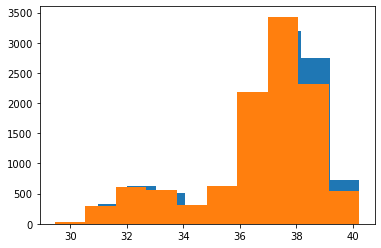

In [88]:
plt.hist(do_df['scf_LSAT'], label='scf')
plt.hist(do_df['fct_LSAT'], label='fact')

### KNN?

In [89]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import BallTree
import scipy

In [90]:
# consider the group female
df[df['male'] == 0].head(5)

,LSAT,UGPA,female,male,white,nonwhite,U,fct_UGPA,fct_LSAT
2,36,3.0,1,0,1,0,-0.736926,3.074983,36.260282
5,37,3.4,1,0,1,0,0.118742,3.374692,37.289056
6,30,3.6,1,0,1,0,0.502870,3.509239,37.760340
25,37,3.6,1,0,1,0,0.571085,3.533132,37.844652
34,36,2.7,1,0,1,0,-1.346477,2.861479,35.544774


In [91]:
# consider the female i=2
i = 2
# such that
i_fct = do_df.loc[i, ['UGPA', 'LSAT']] # or shoulf I predict it? should I also incorporate threshold
print(i_fct)
i_scf = do_df.loc[i, ['scf_UGPA', 'scf_LSAT']]
print(i_scf)

UGPA     3.0
LSAT    36.0
Name: 2, dtype: float64
scf_UGPA     2.941937
scf_LSAT    36.854251
Name: 2, dtype: float64


In [92]:
# create the control group around i_fct
X_cont = df[df['male']==0][['UGPA', 'LSAT']].copy()
X_cont.head(5)

,UGPA,LSAT
2,3.0,36
5,3.4,37
6,3.6,30
25,3.6,37
34,2.7,36


In [93]:
X_cont.to_numpy()

array([[ 3. , 36. ],
       [ 3.4, 37. ],
       [ 3.6, 30. ],
       ...,
       [ 3.8, 33. ],
       [ 3.5, 31. ],
       [ 4. , 36. ]])

In [94]:
tree = BallTree(X_cont.to_numpy(), leaf_size=2) 
tree

In [95]:
dist, ind = tree.query([X_cont.to_numpy()[i]], k=11) 
#dist, ind = tree.query([i_fct.to_numpy()[i]], k=11) 
print(dist)
print(ind)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 133 3307 2296 4244 2962 3651 1319    2 3137  714  205]]


In [96]:
# it returns itself
print(i_fct)
X_cont.iloc[205]

UGPA     3.0
LSAT    36.0
Name: 2, dtype: float64


UGPA     3.6
LSAT    30.0
Name: 939, dtype: float64

In [98]:
# create the test group around i_fct
X_test = do_df[do_df['org_male']==1][['scf_UGPA', 'scf_LSAT']].copy()
X_test.head(5)

,scf_UGPA,scf_LSAT
3,3.106524,37.424839
4,2.397430,31.177707
7,3.511577,38.866980
8,2.819079,36.434009
11,3.185811,37.702854


In [99]:
tree_t = BallTree(X_test.to_numpy(), leaf_size=2) 
tree_t

In [104]:
[do_df.loc[i, ['scf_UGPA', 'scf_LSAT']].to_numpy()]

[array([ 2.94193655, 36.85425099])]

In [105]:
dist, ind = tree.query([do_df.loc[i, ['scf_UGPA', 'scf_LSAT']].to_numpy()], k=11) 
#dist, ind = tree.query([i_fct.to_numpy()[i]], k=11) 
print(dist)
print(ind)

[[0.15166228 0.15166228 0.15166228 0.15166228 0.15166228 0.15166228
  0.15166228 0.15166228 0.15166228 0.15166228 0.15166228]]
[[3408 2541  811  429 2977 1879 2456 1203 2318 2258 2656]]


In [108]:
print(i_fct)
print(i_scf)
X_test.loc[3408, ]

UGPA     3.0
LSAT    36.0
Name: 2, dtype: float64
scf_UGPA     2.941937
scf_LSAT    36.854251
Name: 2, dtype: float64


scf_UGPA     3.411372
scf_LSAT    38.505121
Name: 3408, dtype: float64

In [ ]:
# bit strange the joint search???! ask salvatore... we could prioratize given the causal order (i.e. the weights?)
# but this seems to be the pipeline, no? generate i_fct and i_scf, train a ball on A=a and A=a' respectively,
# and then find the closes neighbors 


### --- misc:

In [ ]:
# male ugpa + white ugpa + ugpa_intercept
0.761571 + 0.880808 + 1.574632
# gives the intercept when I run male and white as the baseline
# but here is interesting bcs i wonder how this looks in terms of edges, no?

In [ ]:
"""
same dist of Us and LSAT and UGPA for male and white as benchmarks
> sense_cols
[1] "female"   "nonwhite"
> eta_a_ugpa
[1]  0.1132429 -0.2275812
> eta_a_lsat
[1] -0.01449607 -0.13603405
> ugpa0
[1] 3.216965
> lsat0
[1] 3.627609
"""

In [ ]:
# we can retreive the weights too...
# ugpa0 would mean white and male.. thus:
3.216965 + -0.2275812 # male + non-white

# vs all vars
0.761571 + 0.652492 -0.262836

In [ ]:
"""
without the intercepts but still same dist of Us and LSAT and UGPA for male and white as benchmarks
> sense_cols
[1] "female"   "male"     "white"    "nonwhite"
> eta_a_ugpa
[1] 1.621399 1.508263 1.708761 1.480915
> eta_a_lsat
[1] 1.776778 1.791329 1.836215 1.700086

> eta_u_ugpa
[1] 0.2690262
> eta_u_lsat
[1] 0.02924528
"""

#https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model
#https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-why-are-r2-and-f-so-large-for-models-without-a-constant/

# first, it's whether to include or not the intercept, which I think we should. otherwise, we claim that the 
# function passes through 0 and E[Y|X=0]=0 which is not the case, here
# second, whethere to include all the single encodings or the diverging groups
# based on standard ML and Stats practices, if we include the intercept, we should drop the base group(s) for proper identification
# not sure why kusner didn't do this in their paper... when, e.g., they ran their models and R kept dropping variables
# bcs they had an intercept!

In [ ]:
# we need to know the functional specifications of each X
# the dag to know where to intervene 
# tbh.... I don't get the weights? why do we need to find U|evidence? the abduction step makes no sense!!!
# maybe ask karima?

In [ ]:
# consider some factual of a female candidate
i = 0 
df.iloc[i,]

In [ ]:
i_ugpa_scf = ugpa_w["ugpa0"] + ugpa_w["eta_u_ugpa"]*df.iloc[i]['U'] + ugpa_w['white'] + ugpa_w['male']
i_ugpa_scf

In [ ]:
i_lsat_scf = np.exp(lsat_w["lsat0"] + lsat_w["eta_u_lsat"]*df.iloc[i]['U'] + lsat_w['white'] + lsat_w['male'])
i_lsat_scf

In [ ]:
# the above mapping needs to be made cleaner... like a class.. translate the dag into a mapping [check the imt scripts for inspiration]
